In [ ]:
pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Reading data in Terminal (uncomment when required)
df = pd.read_csv('telco_churn_data.csv')

#first few rows
print(df.head())

#Columsn List
print(df.columns)

#Summary
print(df.info())

#Checking for missing values
print(df.isnull().sum())

#print(df.duplicated().sum())

##df['gender'].value_counts().plot(kind='bar')
#plt.show()



  Customer ID Referred a Friend  Number of Referrals  Tenure in Months  \
0  8779-QRDMV                No                    0                 1   
1  7495-OOKFY               Yes                    1                 8   
2  1658-BYGOY                No                    0                18   
3  4598-XLKNJ               Yes                    1                25   
4  4846-WHAFZ               Yes                    1                37   

     Offer Phone Service  Avg Monthly Long Distance Charges Multiple Lines  \
0      NaN            No                               0.00             No   
1  Offer E           Yes                              48.85            Yes   
2  Offer D           Yes                              11.33            Yes   
3  Offer C           Yes                              19.76             No   
4  Offer C           Yes                               6.33            Yes   

  Internet Service Internet Type  ...   Latitude   Longitude Population  \
0          

In [4]:
# Calculate social score based on Number of Referrals and Tenure in Months
df['social_score'] = df['Number of Referrals'] * df['Tenure in Months']

In [5]:
# Define bins for social scores (0-100, 101-200, 201-300, etc.)
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800]

# Create labels for each bin
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800']

# Cut the social score into bins
df['binned_score'] = pd.cut(df['social_score'], bins=bins, labels=labels, include_lowest=True)

# Group by the binned score and count the number of customers in each bin
grouped = df.groupby('binned_score').size()


C:\Users\NJM\AppData\Local\Temp\ipykernel_24708\285488187.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('binned_score').size()


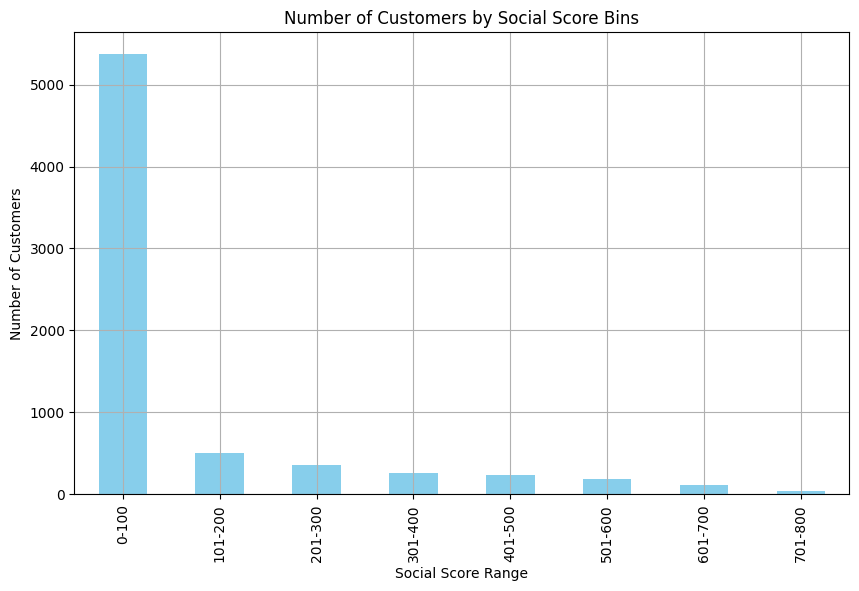

In [6]:
# Plot the number of customers per social score bin
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='skyblue')
plt.title('Number of Customers by Social Score Bins')
plt.xlabel('Social Score Range')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()